#Séries Temporais: Parte 3 - Testes Estatísticos e ARIMA.

A terceira e ultima aula sobre Séries Temporais aborda a manipulação dos nossos dados para tornar a Time Series em uma Série Estacionária, isto é, uma Série onde a média, variância e a covariância permanecem cosntantes na dimensão do tempo. 

Nessa aula, veremos métodos para a redução dos ruídos existentes (não conseguiremmos eliminar 100% dos ruídos).

##Importando as bibliotecas necessárias:

Para comerçamos essa aula será importado as bibliotecas essenciais para a manipulação do Dataset e da impressão de gráficos. Ao decorrrer das linhas de código serão importados outras bibliotecas que auxiliarão nos testes estatísticos.

In [0]:
#Importando Pandas, numpy e pyplot:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importando o Dataset:

O Dataset disponibilizado pelo Professor Carlos Melo se refere ao consumo de energia elétrica ao decorrer dos mêses. Esse Dataset é o mesmo Dataset disponibilizado na **primeira parte da primeira aula** de Séries Temporais.

Logo no primeiro código, faremos a correção da variável Data, uma vez que essa correção ja foi vista, revista e explicada nas duas aulas anteriores.

In [0]:
#Url do Dataset:
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

#Pedindo ao Pandas para ler o arquivo:
df = pd.read_csv(dataset_path)

#Formatando as Datas:
df.DATE = pd.to_datetime(df.DATE, format="%m-%d-%Y")

#Removendo a coluna clonada:
df.set_index('DATE', inplace=True)

##Teste Dickey Fuller Aumentado (ADF):

Esse Teste Estatístico tem como a finalidade identificar se a Série Temporal possui carater ou não Estacionário. Para isso, importamos a função adfuller da biblioteca statsmodels para fazer essa verificação inicial. **Esse método ja foi mostrado na aula anterior, mas será reutilizado nessa.**

In [0]:
#Importando o biblioteca necessária para aplicar o teste estatístico ADF:
from statsmodels.tsa.stattools import adfuller

#Criando a variável com apenas os valores:
X = df.Value.values

Lembrando da aula anterior que:

* $\text{Valor-p } \leq 0.05$: Rejeitamos $H_0$ e a TS é estacionária; e
* $\text{Valor-p } > 0.05$: Falhamos em rejeitar $H_0$ e a TS é não-estacionária.

In [4]:
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -2.2570
Valor-p: 0.1862
Valores Críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


Observamos aqui que a nossa Time Series (TS) é não-estacionária, pois o Valor-p possui como valor 18,62%. 

##Transformando a TS em Estacionária:

Vimos anteriormente que a nossa TS possui um valor `p` equivalente a 18.62%, para que possamos torna-la uma Série Estacionária, devemos reduzir esse valor obtido.

###Aplicando Logaritmo para reduzir os ruídos:

Um dos primeiros passos a serem realizados para reduzirmos o valo `p` obtido é reduzir as diferenças causadas pelos ruídos. Para isso, aplicamos logaritmo:

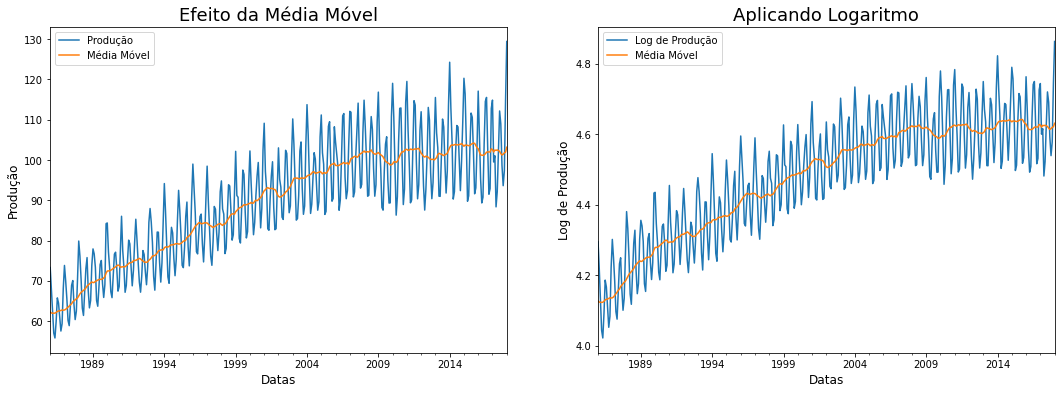

In [5]:
#Criando a média móvel:
med_movel = df.rolling(12).mean()

#Aplicando Logaritmo:
df_log = np.log(df)

#Obtendo a média móvel do logaritmo:
ma_log = df_log.rolling(12).mean()

#Criando a figura no Pyplot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

#Inserindo os valores no primeiro gráfico:
df[12:].plot(ax=ax1)
med_movel[12:].plot(ax=ax1)

#Formatando o primeiro gráfico:
ax1.set_title("Efeito da Média Móvel", fontsize = 18)
ax1.legend(['Produção', 'Média Móvel'])
ax1.set_xlabel('Datas', fontsize = 12)
ax1.set_ylabel('Produção', fontsize = 12)

#Inserido os valores nos segundo gráfico:
df_log[12:].plot(ax=ax2)
ma_log[12:].plot(ax=ax2)

#Formatando o segundo gráfico:
ax2.set_title("Aplicando Logaritmo", fontsize = 18)
ax2.legend(['Log de Produção', 'Média Móvel'])
ax2.set_xlabel('Datas', fontsize = 12)
ax2.set_ylabel('Log de Produção', fontsize = 12);

Como podemos observar: ao comparar as duas imagens obtidas, vimos que com o Logartimo, reduzimos a quantidade de variação causada pelos ruídos. Podemos ver esse resultado ao compararmos as escalas entre esses gráficos: a primeira imagem temos uma escala que inicia do 60 indo até o 130; enquanto que a segunda imagem a escala varia de 4.0 para 4.8.

###Aplicando Diferenciação para reduzirmos a linha de Tendência:

Uma outra forma de aumentarmos ainda mais as nossas porcentagens para classificar essa Time Series como Estacionária é reduzir a linha de Tendência. Essa redução pode ser feita ao diferenciarmos (subtrair) os valores da média móvel.

In [0]:
#Subtraindo o logartimo da média móvel:
df_sub = (df_log - ma_log).dropna()

#Obtendo a nova média móvel:
ma_sub = df_sub.rolling(12).mean()

#Obtendo o Desvio Padrão:
std_sub = df_sub.rolling(12).std()

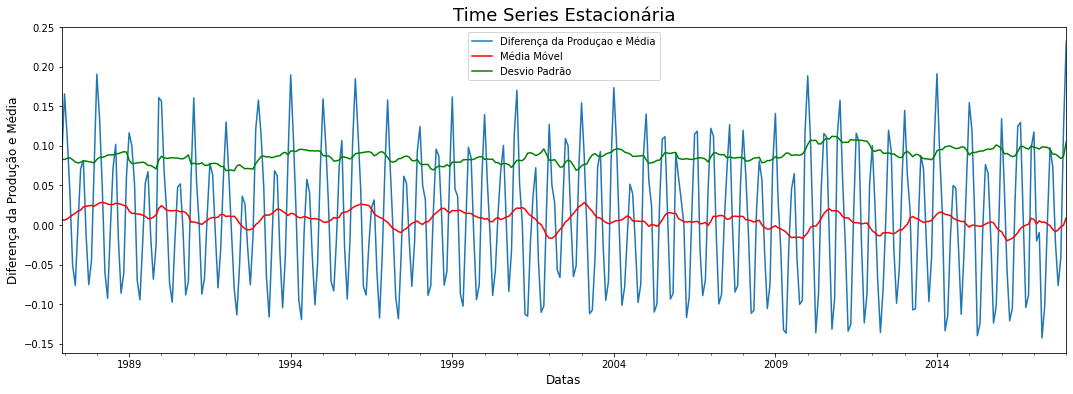

In [7]:
fig, ax = plt.subplots(figsize = (18,6))

#Inserindo os valores no primeiro gráfico:
df_sub[12:].plot(ax=ax)
ma_sub[12:].plot(ax=ax, color = 'r')
std_sub[12:].plot(ax=ax, color = 'g')

#Formatando o primeiro gráfico:
ax.set_title("Time Series Estacionária", fontsize = 18)
ax.legend(['Diferença da Produçao e Média', 'Média Móvel', 'Desvio Padrão'])
ax.set_xlabel('Datas', fontsize = 12)
ax.set_ylabel('Diferença da Produção e Média', fontsize = 12);

Vimos que dessa forma, estamos calculando a Diferença da produção em cima da média. E ao repetir o teste de Dickey Fuller Aumentado, obtemos o seguinte resultado:

In [8]:
#Repetir o ADF:
X_sub = df_sub.Value.values

#Aplicar ADF e imprimir o resultado:
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -5.2116
Valor-p: 0.0000083256
Valores Críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


Otimo! O valor-p desse teste ADF nos mostra que ja podemos classificar esse nosso processo de uma série estacionária, mas caso haja ainda a necessidade de reduzir ainda mais esse Valor-p, podemos subtrair uma linha pela outra, obtendo a Diferença entre os valores com a função `.diff(1)`.

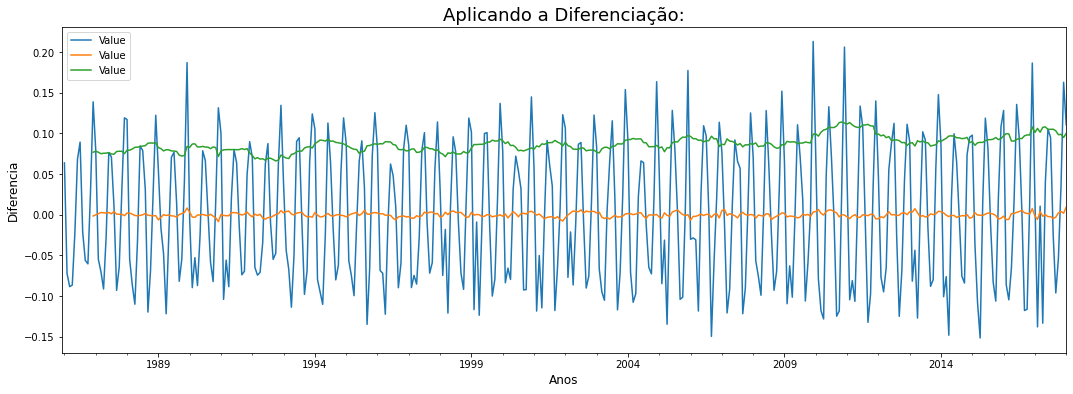

In [9]:
#Aplicando a Diferenciação:
df_diff = df_sub.diff(1)

#Obtendo a nova média móvel (moving_average):
ma_diff = df_diff.rolling(12).mean()

#Obtendo o novo desvio padrão:
std_diff = df_diff.rolling(12).std()

#Criando a figura no Pyplot:
fig, ax = plt.subplots(figsize = (18,6))


df_diff.plot(ax=ax)
ma_diff.plot(ax=ax)
std_diff.plot(ax=ax)

#Formatando o gráfico:
plt.title("Aplicando a Diferenciação:", fontsize = 18)
plt.xlabel("Anos", fontsize = 12)
plt.ylabel("Diferencia", fontsize = 12);

Agora, ao aplicarmos o Teste ADF novamente, obtemos o seguinte resultado:

In [10]:
#Repetir o ADF:
X_diff = df_diff.Value.dropna().values

#Aplicar ADF e imprimir o resultado:
result_diff = adfuller(X_diff)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -7.6511
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4483
	5%: -2.8694
	10%: -2.5710


O Valor-p obtido é ridiculamente inferior ao nosso limite de 5% proposto anteriormente.

#Forecasting ARIMA:

O Modelo Auto-Regressivo Integrado de Médias Móveis (Autoregressive Integrated Moving Average ou ARIMA, na sigla em inglês) são utilizados com a finalidade de prever os comportametnos de séries temporais.

In [11]:
#Importando as bibliotecas necessárias para o ARIMA:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags = 25)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


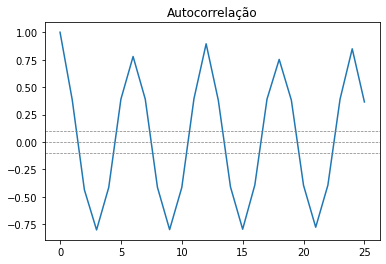

In [12]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show()

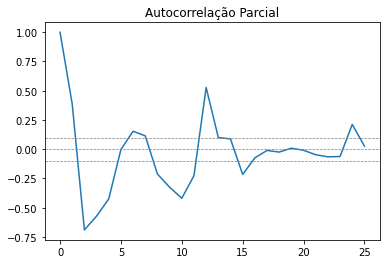

In [13]:
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [14]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log, order = (2,1,2))
result_AR = model.fit(disp=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


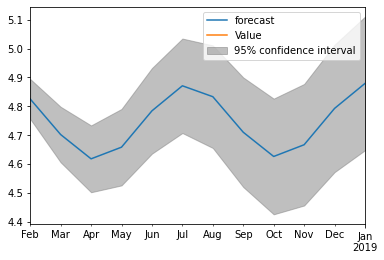

In [15]:
result_AR.plot_predict(start="2018-02-01", end="2019-01-01");